In [1]:
import sys
sys.maxsize

9223372036854775807

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import cm
from collections import OrderedDict
from time import strftime

cmaps = OrderedDict()

In [3]:
tweets=pd.read_csv('tweets.csv', low_memory=False)
users=pd.read_csv('users.csv', low_memory=False)

In [4]:
tweets['favorite_clean']=tweets['favorite_count'].replace('nan', np.nan)
tweets['retweet_clean']=tweets['retweet_count'].replace('nan', np.nan)
tweets['year_tweeted']=tweets['year_tweeted'].astype(str)
tweets['year_tweeted']=tweets['year_tweeted'].replace("\.0",'', regex=True)
tweets['year_tweeted']=pd.to_datetime(tweets['year_tweeted']).dt.year

In [5]:
tweets['month_tweeted']=tweets['month_tweeted'].replace("\.0",'')
tweets['month_tweeted']=tweets['month_tweeted'].replace('NaN', 0)
tweets['month_tweeted'].astype(str)

0          3.0
1         10.0
2          2.0
3         12.0
4          8.0
5         10.0
6          3.0
7         12.0
8         10.0
9          3.0
10         1.0
11        12.0
12         6.0
13         8.0
14         1.0
15         1.0
16         9.0
17         1.0
18         7.0
19         2.0
20         7.0
21        10.0
22         3.0
23         2.0
24         5.0
25         4.0
26         3.0
27         1.0
28        10.0
29        11.0
          ... 
203459     7.0
203460    10.0
203461     9.0
203462     4.0
203463     9.0
203464     2.0
203465     2.0
203466     7.0
203467     9.0
203468     7.0
203469     6.0
203470     1.0
203471     7.0
203472     9.0
203473     7.0
203474    11.0
203475     8.0
203476    11.0
203477     9.0
203478     7.0
203479     7.0
203480     5.0
203481    10.0
203482     4.0
203483    11.0
203484    11.0
203485     6.0
203486     1.0
203487    11.0
203488    12.0
Name: month_tweeted, Length: 203489, dtype: object

In [6]:
import datetime as dt
import calendar
from time import strptime
tweets['month_tweeted']=tweets['month_tweeted'].astype(str)
tweets['month_tweeted']=tweets['month_tweeted'].replace('1.0', 'Jan')
tweets['month_tweeted']=tweets['month_tweeted'].replace('2.0', 'Feb')
tweets['month_tweeted']=tweets['month_tweeted'].replace('3.0', 'Mar')
tweets['month_tweeted']=tweets['month_tweeted'].replace('4.0', 'Apr')
tweets['month_tweeted']=tweets['month_tweeted'].replace('5.0', 'May')
tweets['month_tweeted']=tweets['month_tweeted'].replace('6.0', 'Jun')
tweets['month_tweeted']=tweets['month_tweeted'].replace('7.0', 'Jul')
tweets['month_tweeted']=tweets['month_tweeted'].replace('8.0', 'Aug')
tweets['month_tweeted']=tweets['month_tweeted'].replace('9.0', 'Sep')
tweets['month_tweeted']=tweets['month_tweeted'].replace('10.0', 'Oct')
tweets['month_tweeted']=tweets['month_tweeted'].replace('11.0', 'Nov')
tweets['month_tweeted']=tweets['month_tweeted'].replace('12.0', 'Dec')
tweets['month_tweeted'].head()

0    Mar
1    Oct
2    Feb
3    Dec
4    Aug
Name: month_tweeted, dtype: object

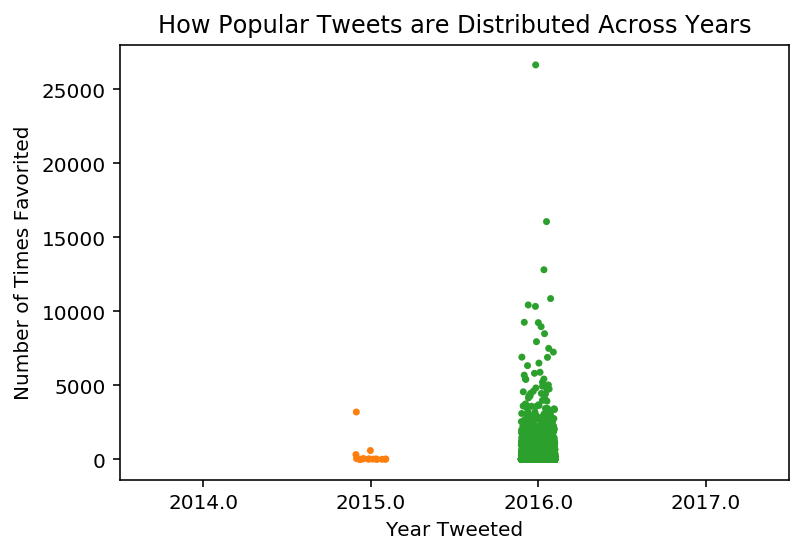

In [7]:
sns.stripplot(x='year_tweeted', y='favorite_clean', data=tweets, size=3.5, jitter=True)
plt.xlabel('Year Tweeted')
plt.ylabel('Number of Times Favorited')
plt.title('How Popular Tweets are Distributed Across Years')
plt.show()

In [8]:
tweets_by_month=tweets['month_tweeted'].value_counts()

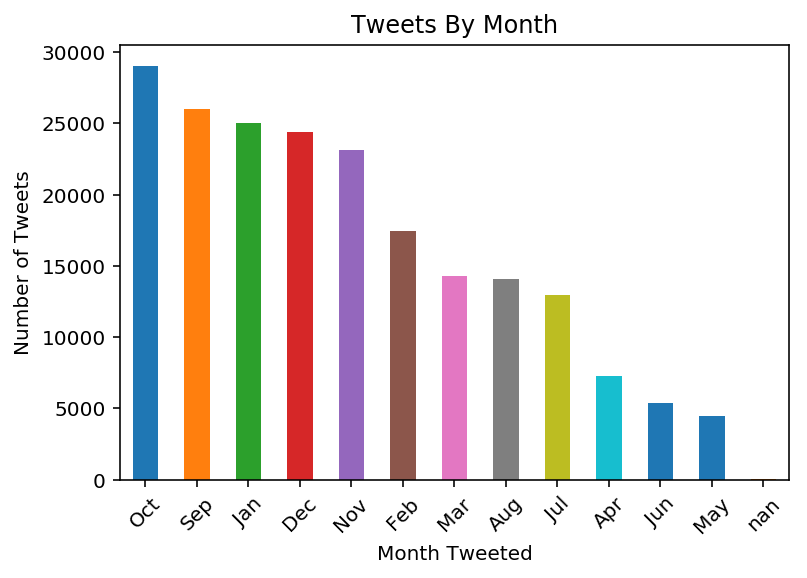

In [9]:
tweets_by_month.plot.bar()
plt.xlabel('Month Tweeted')
plt.ylabel('Number of Tweets')
plt.title('Tweets By Month')
plt.xticks(rotation=45)
plt.show()

In [10]:
tweets.shape

(203489, 21)

In [11]:
users.shape

(454, 15)

In [21]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [25]:
user_grp=tweets.groupby('user_key')
retweet_count=user_grp.retweet_count.count()

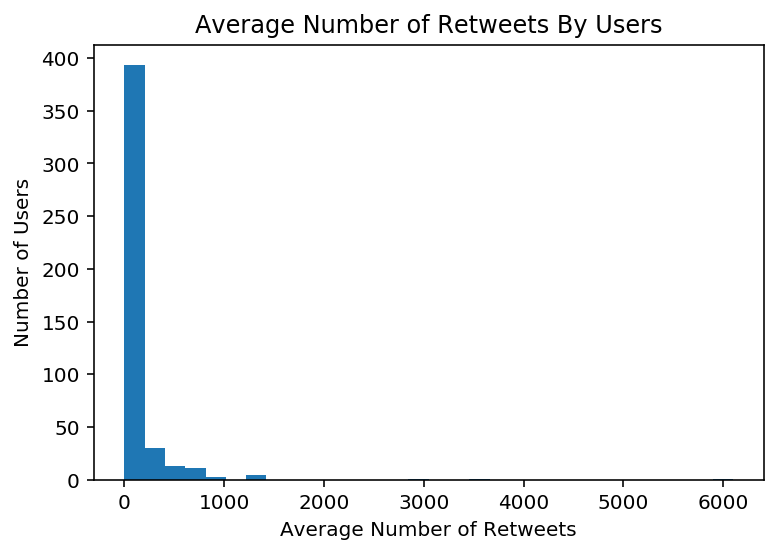

In [30]:
plt.hist(retweet_count, bins=30)
plt.xlabel('Average Number of Retweets')
plt.title('Average Number of Retweets By Users')
plt.ylabel('Number of Users')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
Xtrain, Xtest, ytrain, ytest=train_test_split(tweets['favorite_count'].values(), tweets)

TypeError: 'numpy.ndarray' object is not callable